<a href="https://colab.research.google.com/github/caffonso/NW/blob/main/NeuroModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurowood computer vision

**Project Faber**     date     :             11/Agost/2021

**Training Strategy**


In [ ]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image 
from pylab import *
import pickle
import h5py
import time as tm
from scipy import ndimage, misc,signal

from keras.models import load_model

In [ ]:
class args():
  NumClass  =  2
  Type      =  "*.bmp"
  NumTrain  = 50
  NumTest   = 5
  th        = .25
  th2       = .1
  edge      = 1   
  rx        = 240        
  r0y       = 160        
  ry        = 445        
  delt      = 400        
  xc        = 1050       
  yc        = 510    
  Dx        = 460         #460 230 115
  Dy        = 215         #215 108  54
  X1        = 1280       
  Y1        = 720         
  FrX       = 600         #600 300 150   
  FrY       = 310         #310 155  78 
  action    = 'training' 
  #action    = 'enhance'

In [ ]:
class neurowood():
    
    def RGBData(args):
      Path = ['D:\dataset\A','D:\dataset\B']  
      NumClass,NumTrain,NumTest = args.NumClass,args.NumTrain,args.NumTest
      Dy,Dx,Type       = args.Dy,args.Dx,args.Type
      data_train       = np.zeros((NumClass*NumTrain,Dy,Dx,3))
      data_train_labels= np.zeros((NumClass*NumTrain,NumClass   ))
      data_test        = np.zeros((NumClass*NumTest ,Dy,Dx,3))
      data_test_labels = np.zeros((NumClass*NumTest ,NumClass   ))

      for j in range(0,NumClass):             
        os.chdir(Path[j])
        files=glob.glob(Type)
        for i in range(0,NumTrain):       
          im                   = Image.open(files[i])
#           _,minX,minY              = NW.Wall(pil_im,args)    
#           im                       = NW.enhance(pil_im,args,minX,minY) 
          data_train[i+j*NumTrain] = np.array(im)/256

        for i in range(0,NumTest):
          im                   = Image.open(files[i+NumTrain])
#           _,minX,minY              = NW.Wall(pil_im,args)
#           im                       = NW.enhance(pil_im,args,minX,minY)
          data_test[i+j*NumTest]   = np.array(im)/256   

      for i  in range(0,NumClass):  
        data_train_labels[i*NumTrain:(i+1)*NumTrain,i]= 1   
        data_test_labels[i*NumTest:(i+1)*NumTest   ,i]   = 1 
        
      return data_train, data_train_labels, data_test,data_test_labels  

    def FilterDim5(im0):
      s = np.zeros(180)
      im = im0[:,:,0] + im0[:,:,1]
      f1 = np.array([[1,4,6,4,1], [4,16,24,16,4],[6,24,476,24,6],
                    [4,16,24,16,4],[1,4,6,4,1] ])
      th   = .85      
      out = signal.convolve2d(im,f1*(1/256))  
     
      med = np.average(out)
      for i in range(0,464):
        for j in range(0,216):
          if out[j,i]>med*th:
            out[j,i]=0
            
      for j in range(0,20):  
        for i in range(0,9): 
          s[9*j+i] = sum(out[24*i:24*(i+1),23*j:23*(j+1)])/(24*23)        
     
      return s
    
    def Extract5(X_train):
      X      = np.zeros((args.NumTrain*args.NumClass,180))  
      for i in range(0,args.NumTrain*args.NumClass):
        X[i] = neurowood.FilterDim5(X_train[i])
      
      return X 
    
    def showFeature(im0):
      im = im0[:,:,0] + im0[:,:,1]
      f1 = np.array([[1,4,6,4,1], [4,16,24,16,4],[6,24,476,24,6],
                    [4,16,24,16,4],[1,4,6,4,1] ])
      th   = .85      
      out = signal.convolve2d(im,f1*(1/256))
    
      med = np.average(out)
      for i in range(0,464):
        for j in range(0,216):
          if out[j,i]>med*th:
            out[j,i]=0      
    
      return out    

## Load data

In [ ]:
path0      = "C:/Users/Carlos/AppData/Local/Programs/Python/Python36/Faber/"

#### Raw images 460 x 215

In [ ]:
X,Y,Xv,Yv = neurowood.RGBData(args)
Xft       = neurowood.Extract5(X)

In [ ]:
# Validation  test
preds = ModelFaberNW.evaluate(Xft, Y)
print ("Loss = " + str(round(preds[0],3)))
print ("Test Accuracy = " + str(round(preds[1],4)))

4/4 [==============================] - 1s 3ms/step - loss: 3.9372 - accuracy: 0.0400
Loss = 3.937
Test Accuracy = 0.04


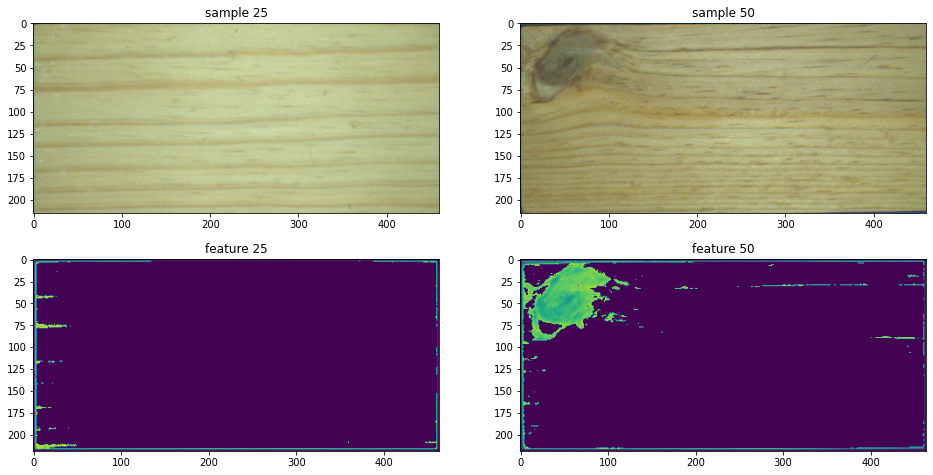

In [ ]:
plt.figure(figsize=(16,8)) 
for i in range(1,3):
  plt.subplot(2,2,i) 
  plt.title('sample '+str(i*25))  
  plt.imshow((X[i*25]))
  plt.subplot(2,2,i+2)
  plt.title('feature '+str(i*25))  
  plt.imshow(neurowood.showFeature(X[i*25]))    

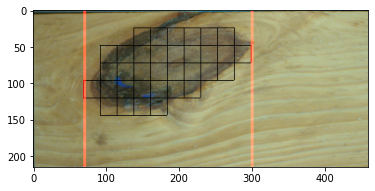

In [ ]:
    Xft = np.zeros((2,180))
    cut1,cut2 = 999, 0
    out = X[64]
    s   = neurowood.FilterDim5(out)
    Xft[0,:] = s
    Class    = np.argmax(ModelFaberNW.predict(Xft[0:1]))
    for j in range(1,20):  
        for i in range(1,9):
          if s[9*j+i]>1 and (1-Class):
            cut1i = 23*j
            cut2i = 23*(j+1)
            out[24*i:24*(i+1)        ,23*j    :23*j+1    ] = 0
            out[24*i:24*(i+1)        ,23*(j+1):23*(j+1)+1] = 0
            out[24*i:24*i+1          ,23*j    :23*(j+1)  ] = 0
            out[24*(i+1):24*(i+1)+1  ,23*j    :23*(j+1)  ] = 0
            if cut1i < cut1: cut1 = cut1i
            if cut2i > cut2: cut2 = cut2i 
    out[:,cut1:cut1+4,0]= 1      
    out[:,cut2:cut2+4,0]= 1 
    plt.imshow(out)

### Feature extraction format
Description of feature extraction schemes


In [ ]:
Path     = "D:\dataset\Faber_DB_feature.pckl"
f = open(Path, 'rb')
[X,Y] = pickle.load(f)

In [ ]:
X.shape


(24000, 180)

### Model

In [ ]:
Path     = path0+"ModelFaber0.h5"
ModelFaberNW = load_model(Path)

In [ ]:
ModelFaberNW.summary()

Model: "KerasModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180)]             0         
_________________________________________________________________
fc0 (Dense)                  (None, 50)                9050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 10)                510       
_________________________________________________________________
fc (Dense)                   (None, 2)                 22        
Total params: 9,582
Trainable params: 9,582
Non-trainable params: 0
_________________________________________________________________


#####  Model description
    
|     File        |Imput      |Trainable param   |layers|val
|---| 
|ModelFaber0.h5   |180     |9582 |5| .945
|ModelFaberft.h5   |180     |9582 |5| .50
|ModelFaber014.h5 |215x410    |58378   |16 | .873